<a href="https://colab.research.google.com/github/happylittle7/TAICA_Generative-AI-Text-and-Image-Synthesis-Principles-and-Practice/blob/main/NTNU_41247032S_%E8%B3%87%E5%B7%A5116_%E5%90%B3%E4%BF%8A%E5%BB%B7_HW10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 打造自己的圖像生成Web App!

我將老師原本的範例保留negative prompt,enhance等所有功能，並再自己額外加上自動補全風格Prompt功能，使用者能選擇風格加在原本的Prompt上。加完後，使用者還能根據自身考量彈性修改最終的Prompt。

首先先安裝必要的套件

In [1]:
%pip install diffusers transformers accelerate safetensors huggingface_hub gradio --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.5/10.5 MB 87.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 512.1/512.1 kB 40.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.2/54.2 MB 19.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.3/323.3 kB 28.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 23.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 18.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 18.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

匯入HuggingFace的API

In [2]:
from huggingface_hub import login
from google.colab import userdata

hf_token = userdata.get('HuggingFace')
login(token=hf_token)

接著把等等會用到的套件import進來

In [3]:
from diffusers import StableDiffusionPipeline, UniPCMultistepScheduler
import torch
import gc
import matplotlib.pyplot as plt
import gradio as gr
import random

接著設定想要的模型，在這邊我選擇使用digiplay/Photon_v1

In [4]:
model_name = "digiplay/Photon_v1"

設定好後，把模型讀到Stable Diffusion的pipeline裡面

In [5]:
pipe = StableDiffusionPipeline.from_pretrained(
    model_name,
    torch_dtype=torch.float16,
    use_safetensors=True
).to("cuda")


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/553 [00:00<?, ?B/s]

Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/520 [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/448 [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.58k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/737 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/582 [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/transformers/models/clip/feature_extraction_clip.py:30: FutureWarning: The class CLIPFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use CLIPImageProcessor instead.
  warnings.warn(


撰寫生圖片時要用的函式，以及江風格prompt插入至原本prompt的函式。

In [40]:
STYLE_SUFFIXES = {
    "梵谷": ", Van Gogh style post-Impressionist oil painting, thick impasto brushstrokes, swirling sky and energetic strokes, vibrant contrasts of ultramarine blue and sunflower yellow, expressive lighting, visible canvas texture",

    "畢卡索": ", in the style of Pablo Picasso, bold Cubist forms, fragmented geometry, vivid yet limited color palette (ochre, cobalt blue, vermilion), multiple viewpoints merged, expressive brushstrokes, early-20th-century modernism vibe",

    "塗鴉": ", vibrant street graffiti style, bold spray-paint strokes, dripping neon colors, layered tags and stencils, gritty urban wall texture, high‐contrast outlines, energetic hip-hop vibe",

    "寫實人物": ", ultra-detailed photorealistic portrait, natural skin texture, soft cinematic lighting, shallow depth of field, 85 mm lens at f/1.4, 8K UHD, masterpiece"
}

default_enhance = "masterpiece, ultra high quality, intricate skin details, cinematic lighting"
default_negative = "bad anatomy, blurry, disfigured, poorly drawn hands, extra fingers, mutated hands, low quality, worst quality"


def refine_prompt(user_prompt, style):
    suffix = STYLE_SUFFIXES.get(style, "")
    if not user_prompt.strip():
        return "Please enter a prompt first!"
    return user_prompt.strip() + suffix

def generate_image(prompt, style, guidance, steps, use_custom_seed, seed, use_enhance, enhance_text, use_negative, negative_text):

    suffix = STYLE_SUFFIXES.get(style, "")
    full_prompt = prompt + suffix if suffix not in prompt else prompt

    if use_custom_seed is False:
        seed = random.randint(0, 2**32)
    if use_enhance is True:
        full_prompt += ", " + enhance_text

    final_negative = negative_text if use_negative else None

    gc.collect()
    torch.cuda.empty_cache()

    generator = torch.Generator("cuda").manual_seed(seed)
    image = pipe(prompt=full_prompt,
                 guidance_scale=guidance,
                 negative_prompt=final_negative,
                 num_inference_steps=steps,
                 generator=generator).images[0]
    return image, seed

最後就可以使用Gradio打造Web介面了！

In [41]:

with gr.Blocks(gr.themes.Citrus(), title="自動風格prompt補全圖片產生器") as demo:
    gr.Markdown("# 自動風格prompt補全圖片產生器")
    gr.Markdown("只要輸入提示詞並選擇風格，按下「補上提示詞！」後即可自動補上風格的Prompts，快速升成各種風格的圖片！")

    with gr.Row():
        with gr.Column(scale=6):
            prompt = gr.Textbox(label="Prompt", placeholder="請輸入你的提示詞 (prompt)", lines=3)

            with gr.Column():
                style = gr.Dropdown(
                label="選擇風格",
                choices=list(STYLE_SUFFIXES.keys()),
                value="賽博龐克"
        )
                refine_btn = gr.Button("補上提示詞！")
                refine_btn.click(fn=refine_prompt, inputs=[prompt, style], outputs=prompt)

            with gr.Row():
                use_enhance = gr.Checkbox(label="加強 Prompt", value=True)
                enhance_text = gr.Textbox(label="加強內容", value=default_enhance)
            with gr.Row():
                use_negative = gr.Checkbox(label="使用 Negative Prompt", value=True)
                negative_text = gr.Textbox(label="Negative Prompt 內容", value=default_negative)
            with gr.Row():
                use_custom_seed = gr.Checkbox(label="自訂 Random Seed", value=False)
                custom_seed = gr.Number(label="指定 seed (選填)", value=42)
            with gr.Row():
                height = gr.Dropdown(["512", "768", "1024"], label="高度 Height", value="512")
                width = gr.Dropdown(["512", "768", "1024"], label="寬度 Width", value="512")
            with gr.Row():
                steps = gr.Slider(10, 50, value=20, step=5, label="生成步數 (Steps)")
                num_images = gr.Slider(1, 4, step=1, value=1, label="生成張數")
            with gr.Row():
                guidance = gr.Slider(1, 20, value=7.5, label="Guidance")

        with gr.Column(scale=6):
            output = gr.Image(type="pil", label="生成圖片")
            seed_info = gr.Label(label="使用的 Random Seeds")



    submit = gr.Button("✨ 生成圖片")


    submit.click(fn=generate_image,
                 inputs=[prompt, style, guidance, steps, use_custom_seed, custom_seed, use_enhance, enhance_text, use_negative, negative_text],
                 outputs=[output,seed_info])


In [ ]:
demo.launch(share=True, debug=True)

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://bc915eb3d2b91e6fb4.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

## 截圖

實際跑起來效果不錯，蠻方便好用的。

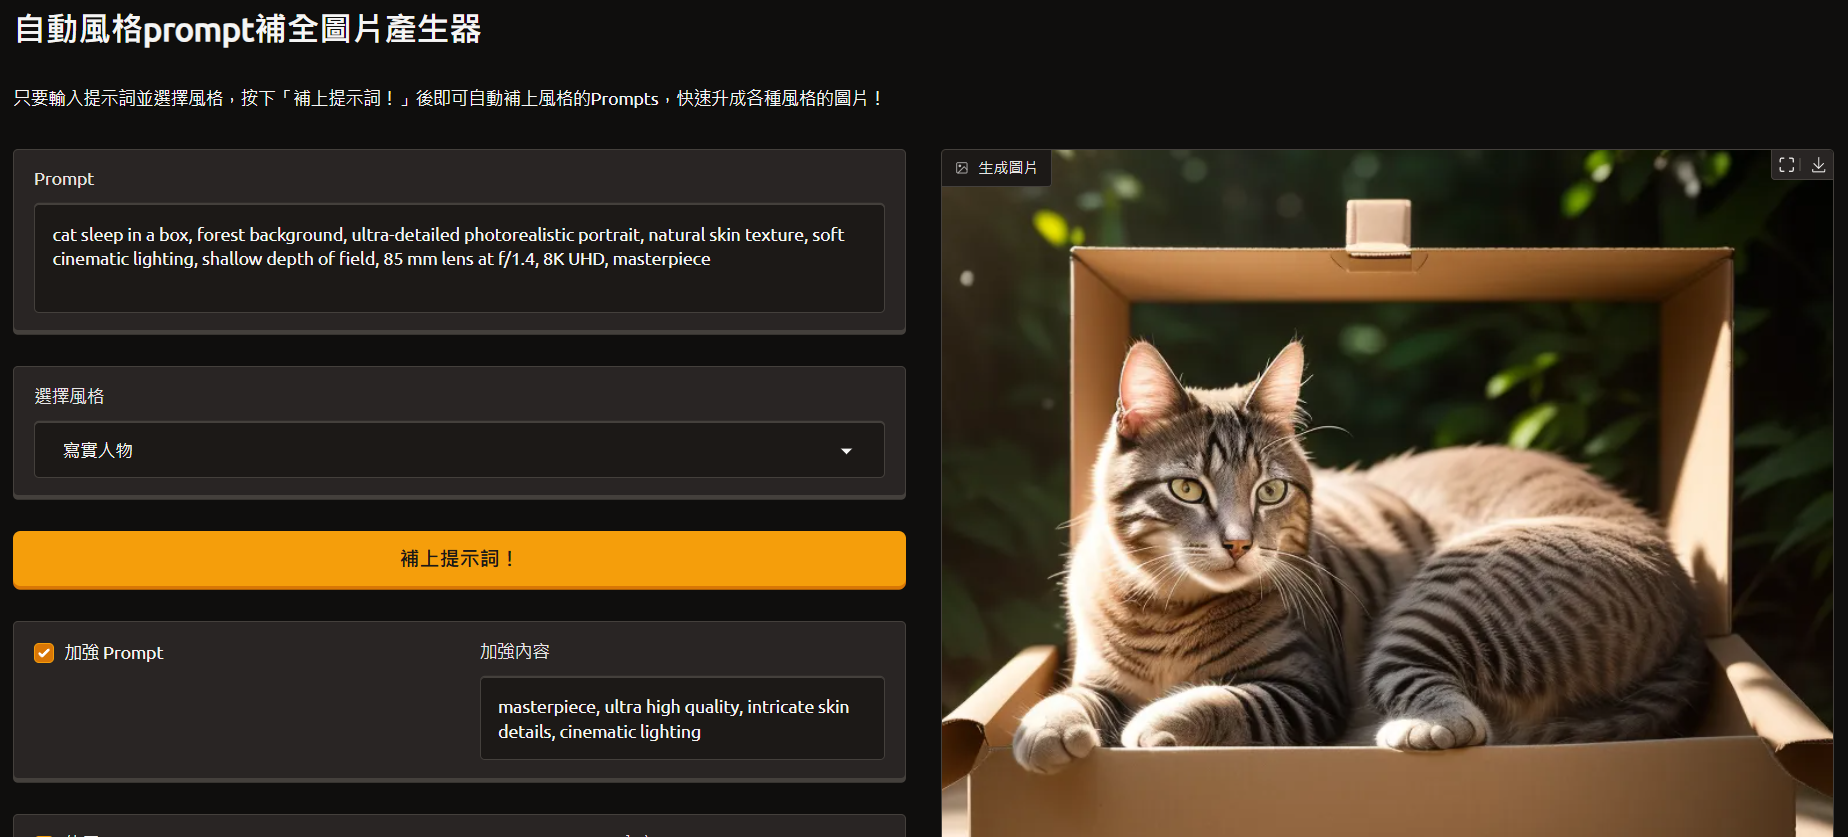

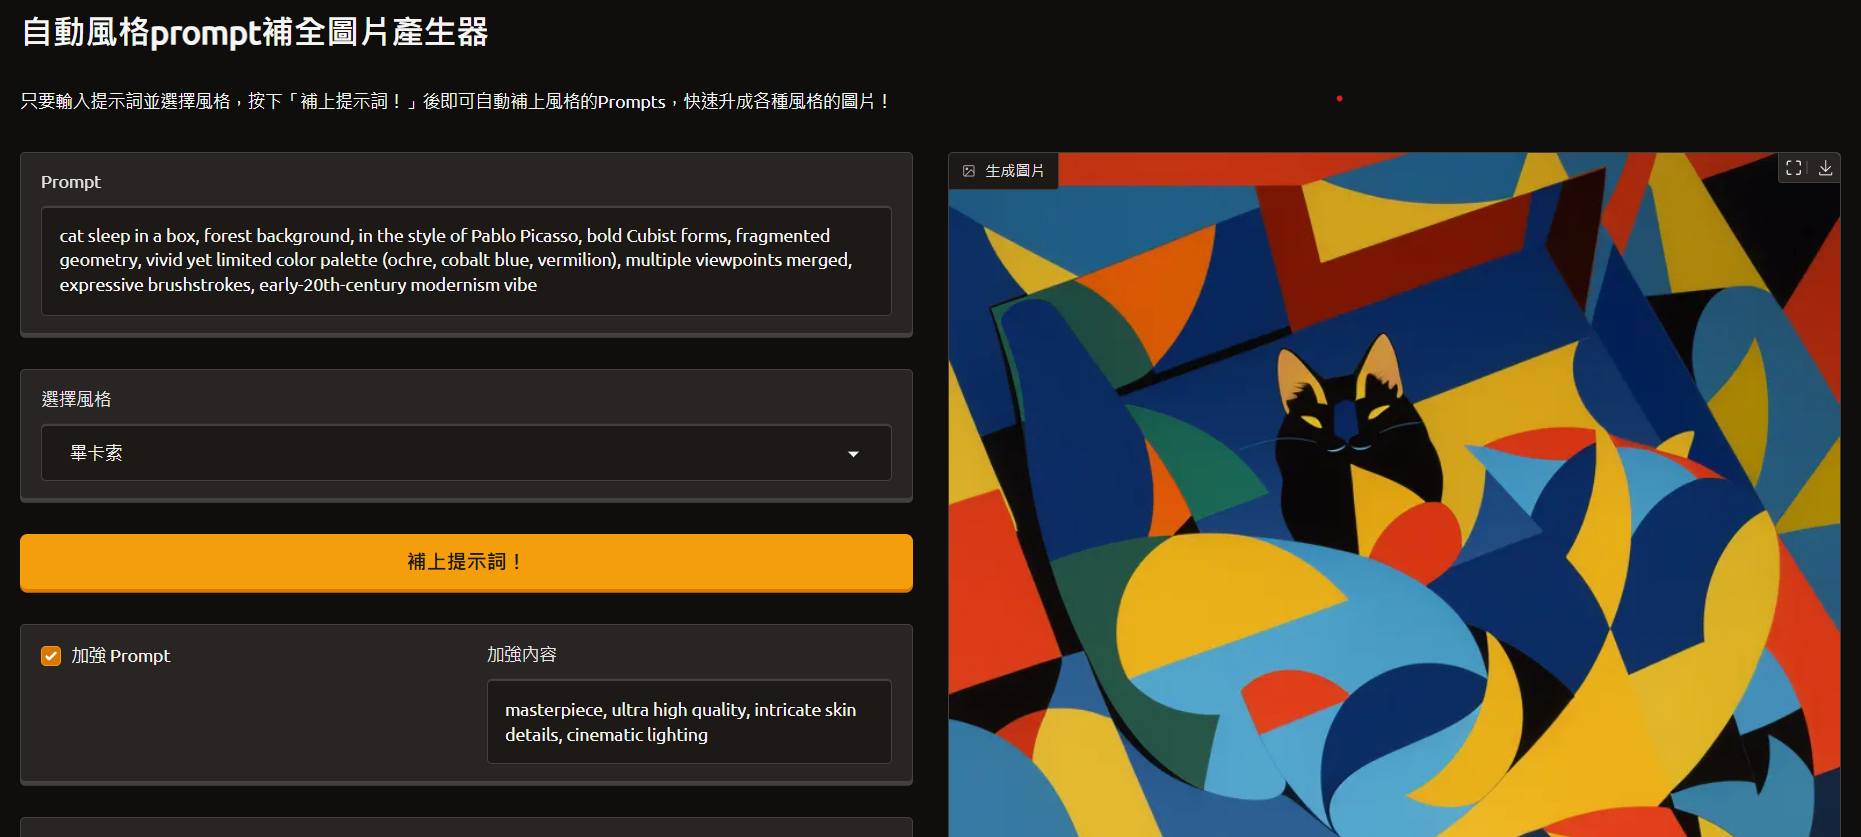